# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

data = pd.read_csv('all_building_data.csv')
data['Time'] = pd.to_datetime(data['Time'])
data = data.set_index('Time')

summary = data.describe()

C:\Users\annec\AppData\Local\Temp\ipykernel_11444\2135981548.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(desired_order, rotation=90, fontsize=17)
C:\Users\annec\AppData\Local\Temp\ipykernel_11444\2135981548.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(desired_order, rotation=90, fontsize=17)
C:\Users\annec\AppData\Local\Temp\ipykernel_11444\2135981548.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(desired_order, rotation=90, fontsize=17)
C:\Users\annec\AppData\Local\Temp\ipykernel_11444\2135981548.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_x

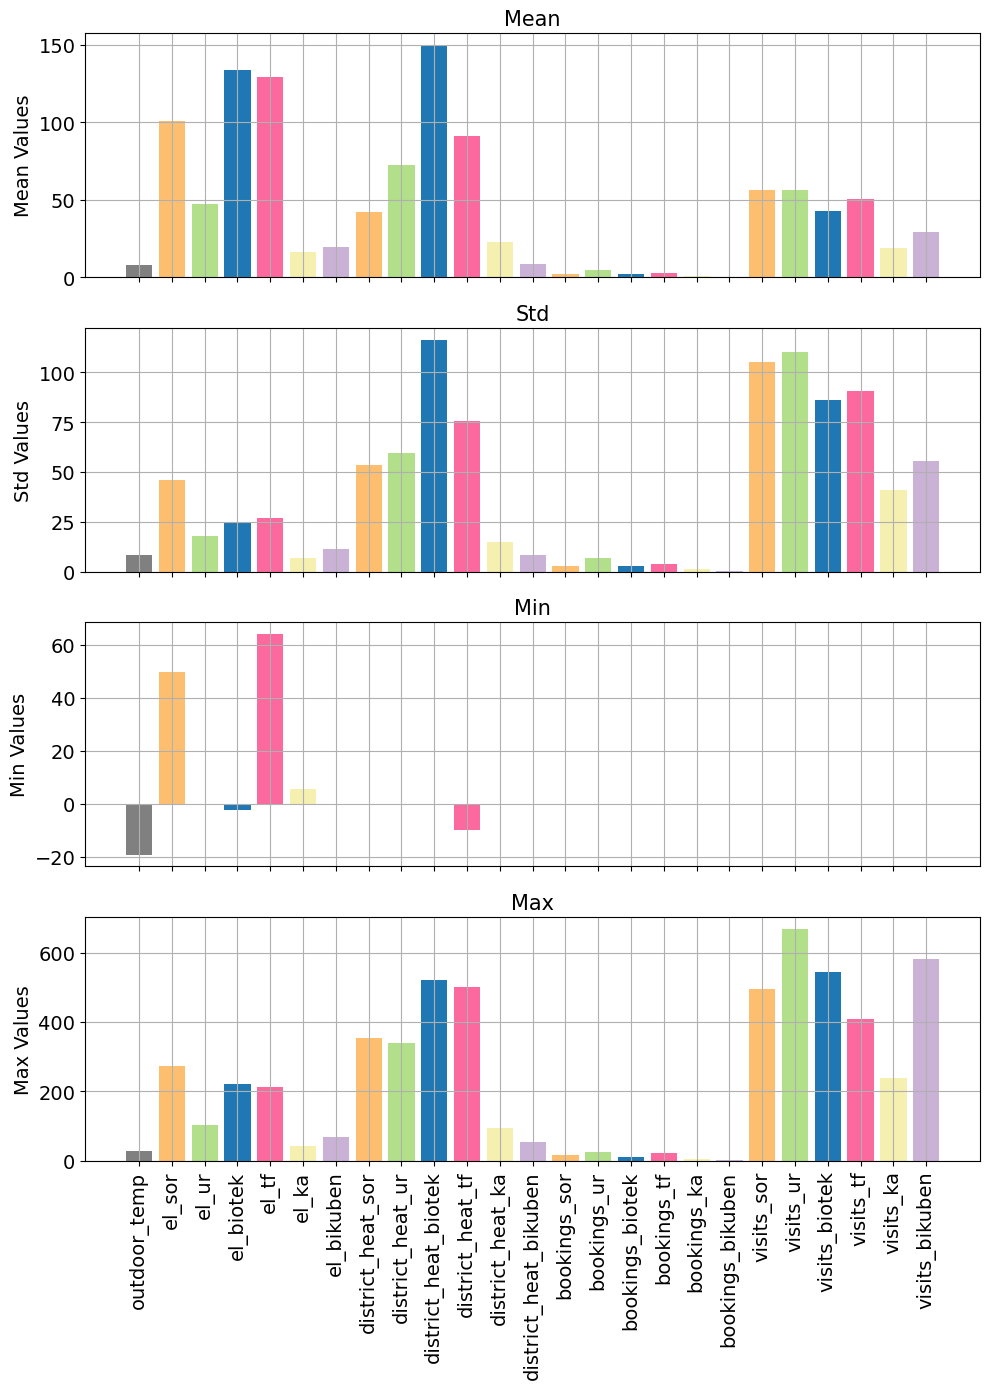

In [3]:
desired_order = ['outdoor_temp', 'el_sor', 'el_ur', 'el_biotek', 'el_tf', 'el_ka', 'el_bikuben',
    'district_heat_sor', 'district_heat_ur', 'district_heat_biotek', 'district_heat_tf', 
    'district_heat_ka', 'district_heat_bikuben',
    'bookings_sor', 'bookings_ur', 'bookings_biotek', 'bookings_tf', 'bookings_ka', 
    'bookings_bikuben',
    'visits_sor', 'visits_ur', 'visits_biotek', 'visits_tf', 'visits_ka', 'visits_bikuben']
    

# Order the summary table
summary = summary[desired_order]

# Define color mapping for column suffixes same as the pallette=accent
color_mapping = {
    '_sor': '#fdbf6f',
    '_ur': '#b2df8a',
    '_biotek': '#1f78b4',
    '_tf': '#fc699f',
    '_ka': '#f5efb0',
    '_bikuben': '#cab2d6',}

# Assign colors based on column suffix
colors = []
for column in desired_order:
    suffix = '_' + column.split('_')[-1] if '_' in column else column
    color = color_mapping.get(suffix, 'gray')  # Default to gray if not matched
    colors.append(color)

# Statistics to plot
statistics_to_plot = ['mean', 'std', 'min', 'max']

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 14), sharex=True)

# Plot each statistic
for i, stat in enumerate(statistics_to_plot):
    axes[i].bar(desired_order, summary.loc[stat], color=colors)
    axes[i].set_title(stat.capitalize(), fontsize=15)
    axes[i].set_ylabel(f'{stat.capitalize()} Values', fontsize=14)
    axes[i].set_xticklabels(desired_order, rotation=90, fontsize=17)
    axes[i].tick_params(axis='both', labelsize=14)
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
#fig.savefig("Descriptive statistics plotted - RAW data.png", dpi=300, bbox_inches="tight")

In [4]:
#plt.savefig("Descriptive statistics plotted - RAW data.png", dpi=300, bbox_inches="tight")

In [5]:
# Sørhellinga
sor = data[['outdoor_temp', 'el_sor', 'district_heat_sor', 'bookings_sor', 'visits_sor']].copy()

# Urbygningen
ur = data[['outdoor_temp', 'el_ur', 'district_heat_ur', 'bookings_ur', 'visits_ur']].copy()

# Kjemi- og bioteknologi
biotek = data[['outdoor_temp', 'el_biotek', 'district_heat_biotek', 'bookings_biotek', 'visits_biotek']].copy()

# TF (Teknologibygget)
tf = data[['outdoor_temp', 'el_tf', 'district_heat_tf', 'bookings_tf', 'visits_tf']].copy()

# Kjemisk analytisk
ka = data[['outdoor_temp', 'el_ka', 'district_heat_ka', 'bookings_ka', 'visits_ka']].copy()

# Bikuben
bikuben = data[['outdoor_temp', 'el_bikuben', 'district_heat_bikuben', 'bookings_bikuben', 'visits_bikuben']].copy()

In [6]:
def plot_time_series_group(df_list, names):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
    accent_palette = sns.color_palette("deep", n_colors=5)
    
    # Plot each in a subplot
    for i, (df, name) in enumerate(zip(df_list, names)):
        # Select columns
        cols = [f'outdoor_temp', f'el_{name.lower()}', f'district_heat_{name.lower()}', f'bookings_{name.lower()}', f'visits_{name.lower()}']
        
        # Plot on the i-th axis
        #df[cols].plot(title=f'{name} Time Plot', color=accent_palette, linewidth=0.5, ax=axes[i])
        df[cols].plot(color=accent_palette, linewidth=0.5, ax=axes[i])
        axes[i].set_title(f'{name} Time Plot', fontsize=16)
        axes[i].set_ylabel('Values', fontsize=14)
        axes[i].set_xlabel('Date', fontsize=14)
        axes[i].tick_params(axis='both', labelsize=14)
        axes[i].get_legend().remove()
        axes[i].grid(True)
    
    legend_labels = ['Outdoor Temperature', 'Electricity', 'District Heating', 'Bookings', 'Visits']
    legend_handles = [Line2D([0], [0], color=accent_palette[j], lw=3) for j in range(5)]
    fig.legend(legend_handles, legend_labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0), fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()
    #fig.savefig("Time plots RAW DATA - sor,ur,btb.png", dpi=300, bbox_inches="tight")
    #fig.savefig("Time plots RAW DATA - tf,ka,bikuben.png", dpi=300, bbox_inches="tight")

# processed1 = plot_time_series_group([ur,sor, biotek], ['Ur', 'Sor', 'Biotek'])
# change fig name
# processed2 = plot_time_series_group([tf, ka, bikuben], ['TF', 'KA', 'Bikuben'])

In [7]:
data = pd.read_csv('all_building_data_stacked.csv')
data['Time'] = pd.to_datetime(data['Time'])
data = data.drop(['Unnamed: 0'], axis=1)
#data
#data['date'] = data.index
#df['hour'] = df['date'].dt.hour
data['month'] = data['Time'].dt.month
monthly_data = data.groupby(['month', 'location']).agg({
    'outdoor_temp': 'mean',  # Example: average temperature per month
    'el': 'sum',             # Example: total electricity usage per month
    'district_heat': 'sum',  # Example: total district heat usage per month
    'bookings': 'sum',       # Example: total bookings per month
    'visits': 'sum'          # Example: total visits per month, handling NaN
}).reset_index()
monthly_data

,month,location,outdoor_temp,el,district_heat,bookings,visits
0,1,bikuben,-2.088441,15997.27,16163.00,93.0,18620.0
1,1,biotek,-2.088441,90997.62,211940.00,1682.0,33674.0
2,1,ka,-2.088441,11187.42,31917.00,525.0,12266.0
3,1,sor,-2.088441,68053.44,84297.00,2170.0,39621.0
4,1,tf,-2.088441,98908.52,138399.76,2711.0,39187.0
...,...,...,...,...,...,...,...
67,12,biotek,1.262097,84347.82,173810.00,4314.0,19759.0
68,12,ka,1.262097,9294.82,26943.00,163.0,7653.0
69,12,sor,1.262097,64249.08,57510.00,3310.0,45602.0
70,12,tf,1.262097,95087.66,133330.05,3574.0,29670.0


In [8]:
# Aggregate the data by day
data['day'] = data['Time'].dt.date
daily_data = data.groupby(['day', 'location']).agg({
    'outdoor_temp': 'mean',  # Average temperature per day
    'el': 'sum',             # Total electricity usage per day
    'district_heat': 'sum',  # Total district heat usage per day
    'bookings': 'sum',       # Total bookings per day
    'visits': 'sum'          # Total visits per day, handling NaN
}).reset_index()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


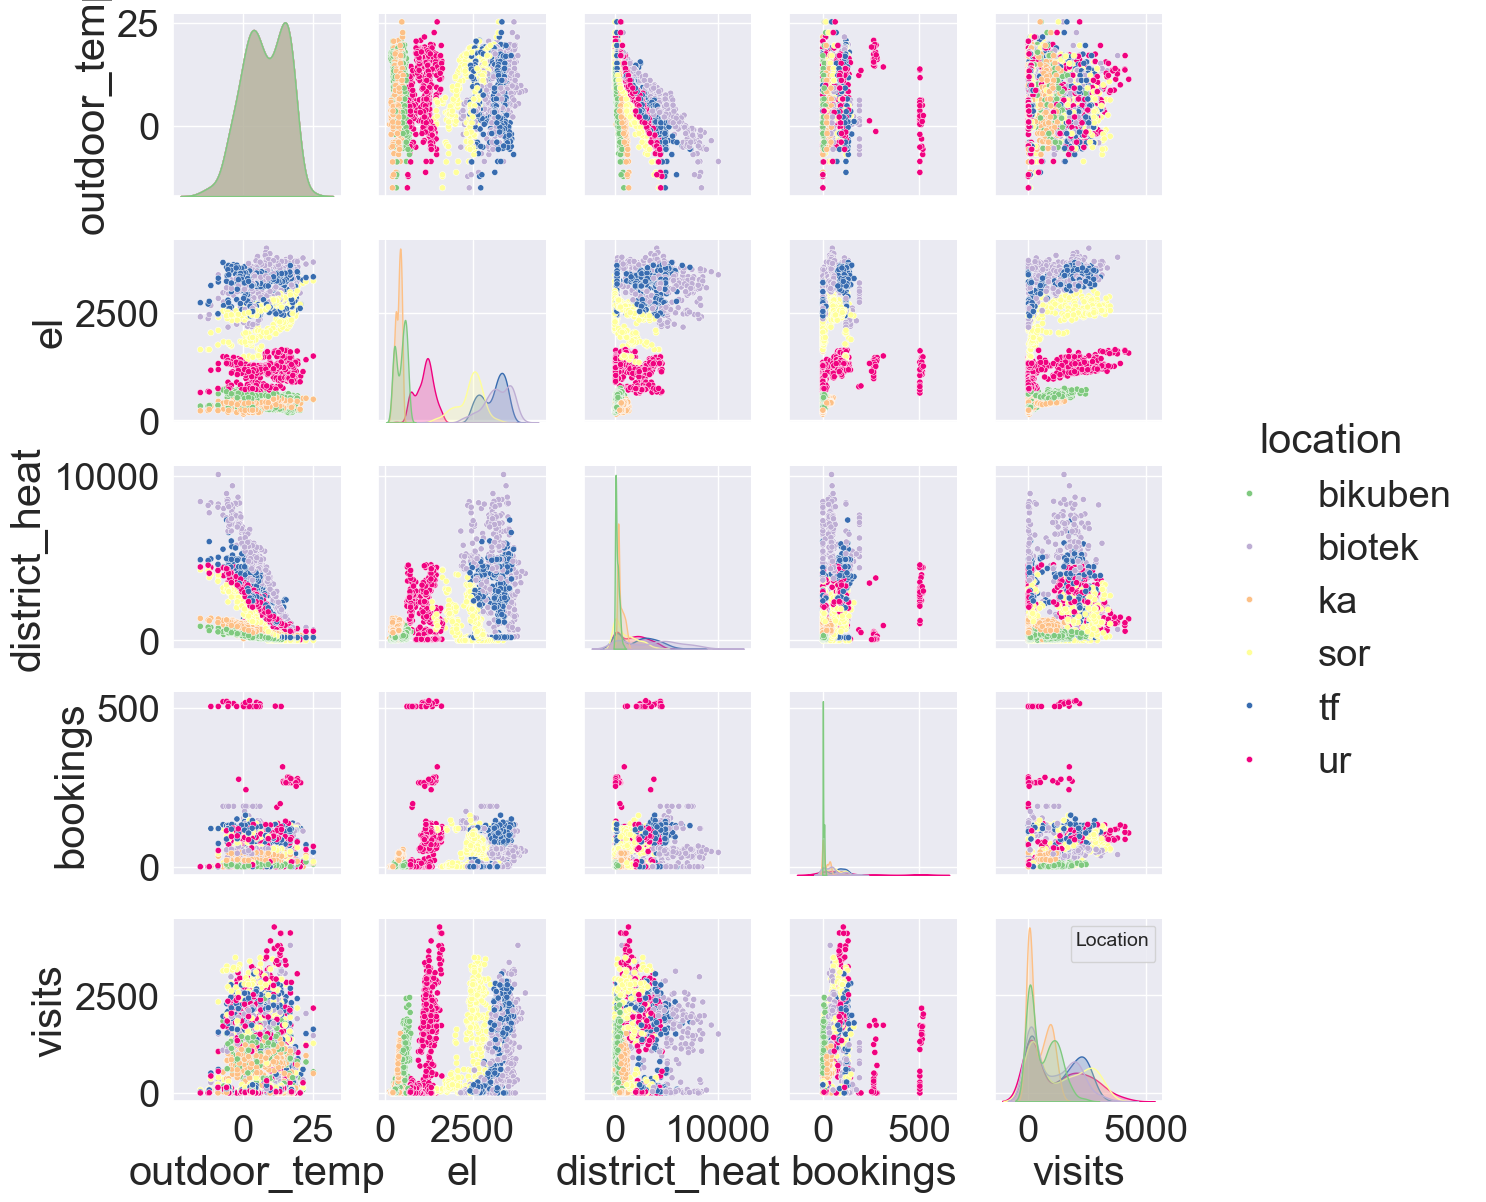

In [9]:
sns.set(font_scale=2.5)
pairplot = sns.pairplot(daily_data, plot_kws={'s': 20}, palette='Accent', hue='location')
plt.legend(title='Location', title_fontsize=14, fontsize=10)

plt.show()
#pairplot.savefig('pairplot.png', dpi=300)

## Extra

In [11]:
sns.set()

### Bikuben

In [13]:
from load_building_data import load_building_data
# load data
data = load_building_data('bikuben')
bikuben = data['bikuben']
bikuben.columns

# rename columns
bikuben.rename(columns={'Fjernvarme': 'District heating', 'Nærkjøling': 'Cooling',
                    'El': 'Electricity', 'Utetemperatur': 'Outdoor Temperature',
                    'Number_of_Bookings': 'Bookings', 'adjusted_visits_raw': 'Visits'}, inplace=True)
bikuben.head()

,District heating,Electricity,Outdoor Temperature,Bookings,Visits
Time,,,,,
2024-03-25 15:00:00,17.0,21.63,1.3,0.0,4.0
2024-03-25 16:00:00,16.0,21.86,0.5,0.0,1.0
2024-03-25 17:00:00,16.0,22.36,0.4,0.0,0.0
2024-03-25 18:00:00,16.0,24.55,0.3,0.0,0.0
2024-03-25 19:00:00,16.0,21.60,0.3,0.0,0.0


Most of the variables are continous variables (measure at discrete intervals), except 'Bookings' and 'Visits', which are dicrete data.

### Expectations for the distributions of the discrete variables
Expected number of people in bikuben each hour during daytime (8-18) is bewteen 50-200, therefor the histogram should be left-skewed.\ 

Bikuben (the classroom Gullvepsen) is expeted to be booked around 1/3 of the time, since the number of bookings are likely to be from 8-16, which is around 8/24 hours of the day.

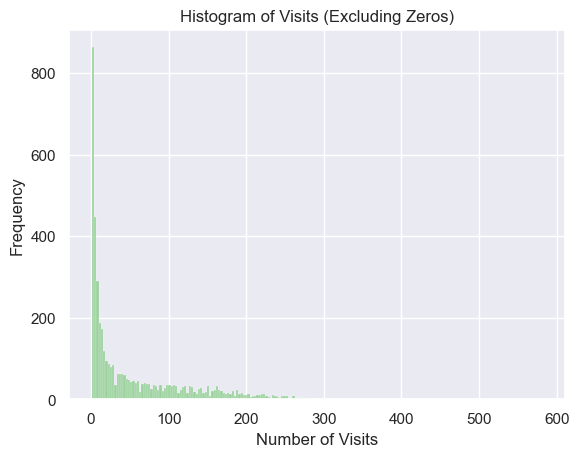

In [16]:
# plot distributions for the discrete variables
filtered_data = bikuben[bikuben['Visits'] > 0]

# Plot the histogram
sns.histplot(filtered_data['Visits'], bins=200, color=sns.color_palette("Accent")[0])

plt.title('Histogram of Visits (Excluding Zeros)')
plt.xlabel('Number of Visits')
plt.ylabel('Frequency')
plt.show()

# plot distributions for the continous variables
# bikuben[['District heating', 'Cooling', 'Electricity']].hist(figsize=(10,10))

In [17]:
#sns.heatmap(round(bikuben.corr(),2), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

### Sørhellinga

In [19]:
# load data
data = load_building_data('sorhellinga')
sor = data['sorhellinga']

# rename columns
sor.rename(columns={'Fjernvarme': 'District heating', 'Nærkjøling': 'Cooling',
                    'El': 'Electricity', 'Utetemperatur': 'Outdoor Temperature', 
                    'adjusted_visits_raw': 'Visits', 
                    'Number_of_Bookings': 'Bookings'}, inplace=True)
#sor.head()

### Expectations for the distributions of the discrete variables
Expected number of people in sorhellinga each hour during daytime (8-18) is bewteen 50-200, therefor the histogram should be left-skewed.\

Sorhelling has more rooms available for booking, at least two rooms are expeted to be booked during daytime.

array([[<Axes: title={'center': 'Bookings'}>,
        <Axes: title={'center': 'Visits'}>]], dtype=object)

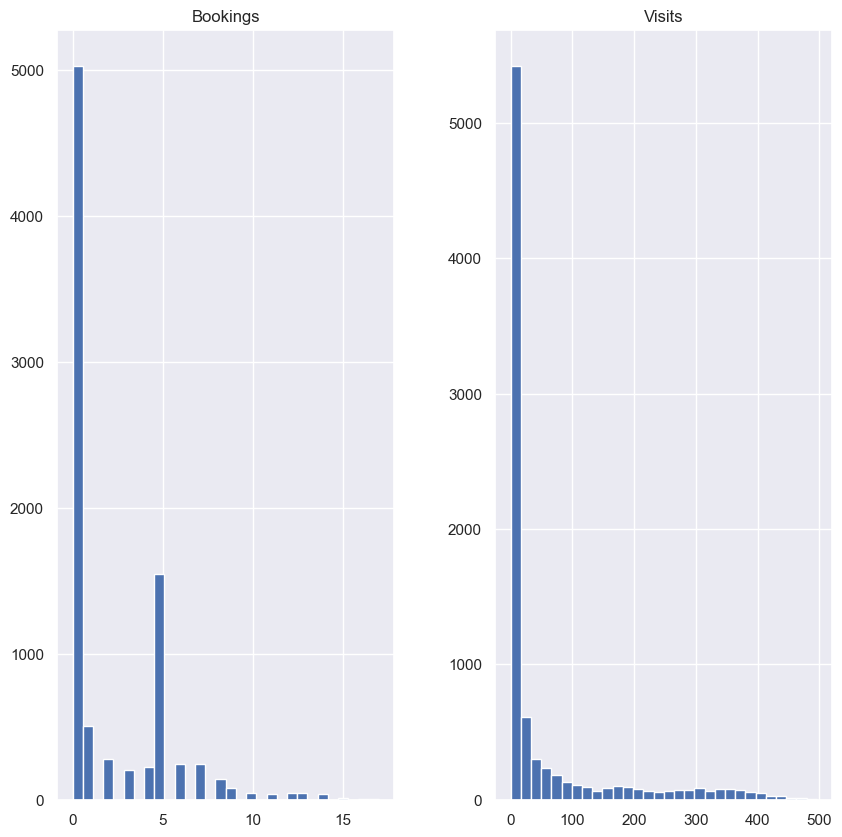

In [21]:
# plot distributions

sor[['Bookings', 'Visits']].hist(figsize=(10,10), bins=30)

#sor[['District heating', 'Electrical Energy', 'Outdoor Temperature', 'Visits']].hist(figsize=(10,10))

Intepretation of plot for bookings:
Almost 60% of the time, no rooms are booked, this is a bit surprising. 

In [23]:
3800/6491

0.5854259744261285

#### Correlation heat map for bikuben and sørhellinga

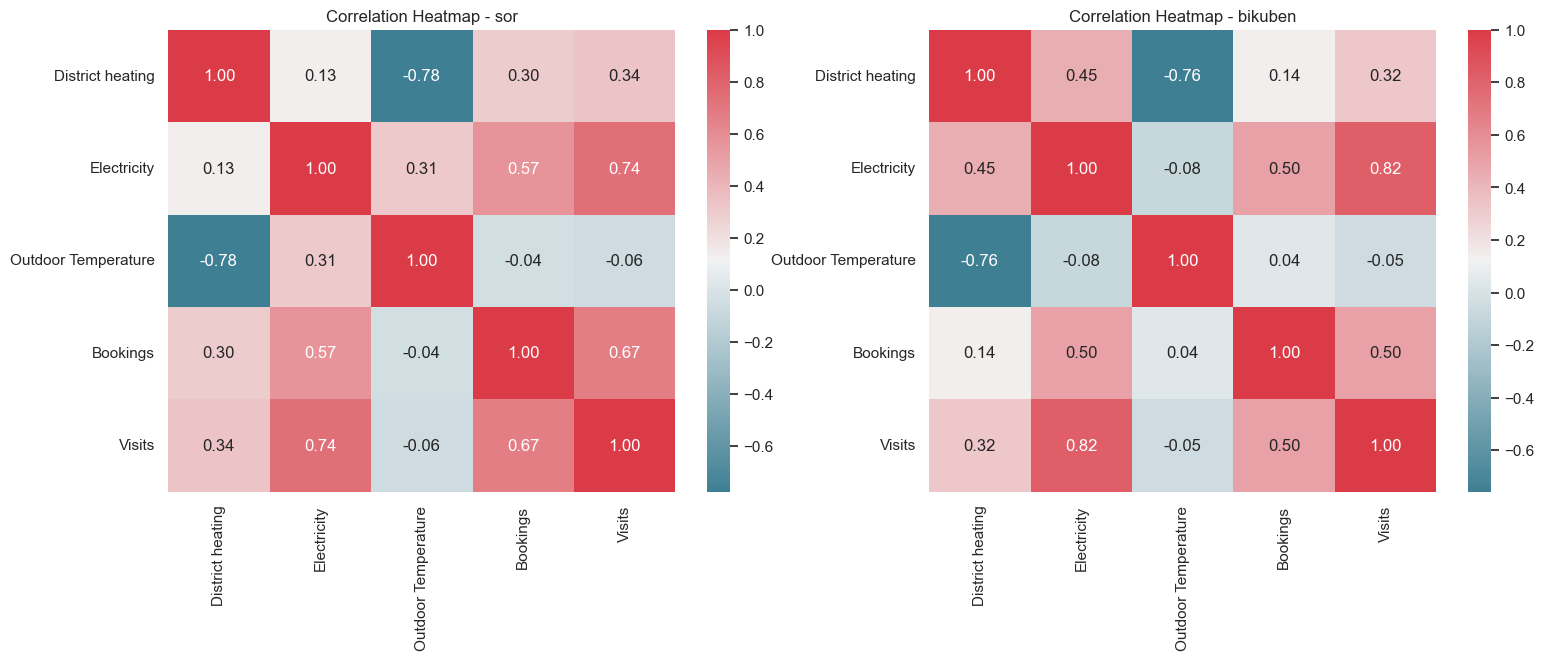

In [25]:
variable_order = ['District heating', 'Electricity', 'Outdoor Temperature', 'Bookings', 'Visits']

# Calculate correlation matrices and order variables
sor_corr = sor[variable_order].corr().loc[variable_order, variable_order]
bikuben_corr = bikuben[variable_order].corr().loc[variable_order, variable_order]

# Plot the heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Heatmap for sor_corr
sns.heatmap(sor_corr, annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=axes[0])
axes[0].set_title('Correlation Heatmap - sor')

# Heatmap for bikuben_corr
sns.heatmap(bikuben_corr, annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=axes[1])
axes[1].set_title('Correlation Heatmap - bikuben')

plt.show()

Two correlations worth noting:\
Outdoor temperature is negatively correlated with district heating, meaning when it is warmer, the district heating decreases. \
The number of visits correlates positively with electrical energy, meaning when more people use a room, the electric heating increases.\
None of the are perfectly correlated, this can be because it depends on how the building heats from sun or how the building keeps heat inside.

### Plotting the two strongest correlations: Electricity/Visits  and  District heating/Outdoor Temperature

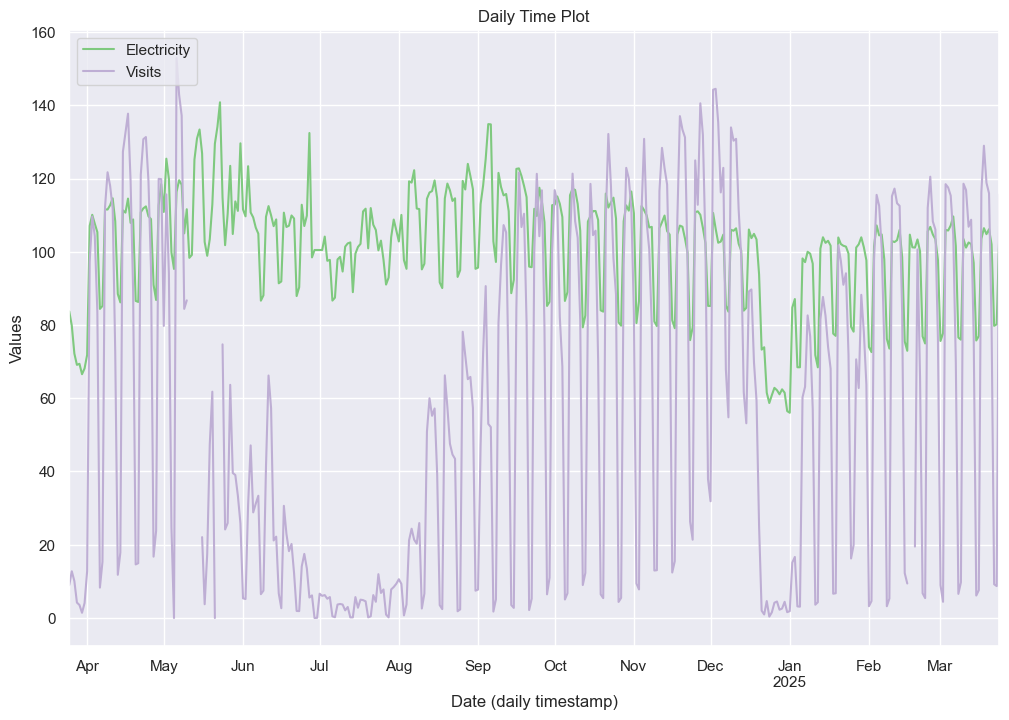

In [28]:
sor_daily = sor[['Electricity','Visits']].resample('D').mean()

accent_palette = sns.color_palette("Accent", n_colors=len(sor_daily.columns))

# Create the plot
ax = sor_daily.plot(title='Daily Time Plot', figsize=(12, 8), color=accent_palette)

# Additional plot configurations
plt.ylabel('Values')
plt.xlabel('Date (daily timestamp)')
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

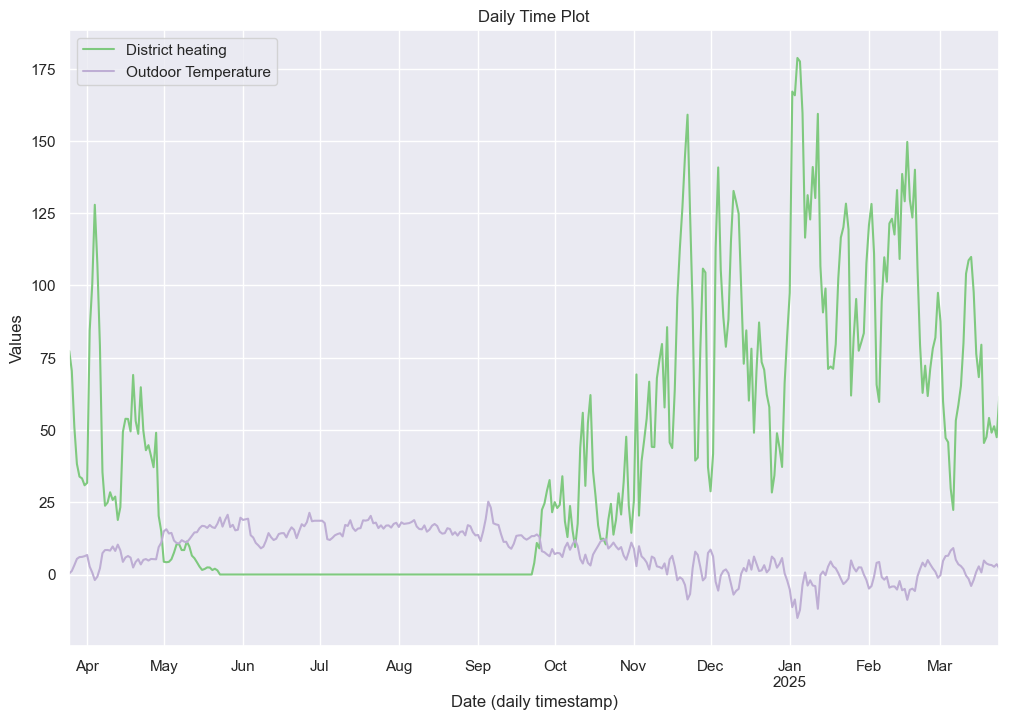

In [29]:
# plot daily
sor_daily = sor[['District heating', 'Outdoor Temperature']].resample('D').mean()

# Plot the daily data
sor_daily.plot(title='Daily Time Plot', figsize=(12, 8), color=accent_palette)
plt.ylabel('Values')
plt.xlabel('Date (daily timestamp)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Energy and visits heatmaps

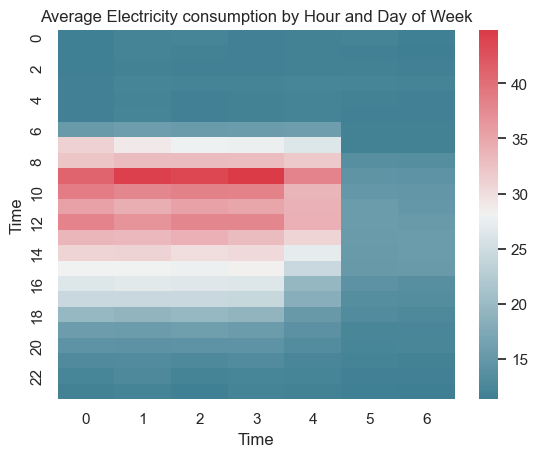

In [31]:
#Heatmap of energy consumption by hour and day
heatmap_data = bikuben.groupby([bikuben.index.hour, bikuben.index.dayofweek])['Electricity'].mean().unstack()
heatmap = sns.heatmap(heatmap_data,cmap=sns.diverging_palette(220, 10, as_cmap=True))
#sns.heatmap(heatmap_data,cmap='cividis')
plt.title("Average Electricity consumption by Hour and Day of Week")
plt.show()

#plt.savefig('Heatmap electricity.png', dpi=300)

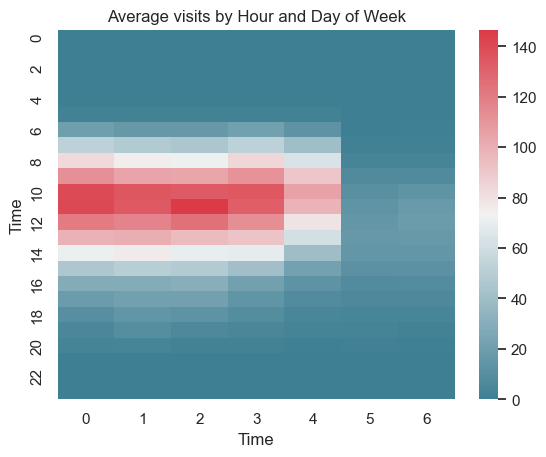

In [32]:
#Heatmap of energy consumption by hour and day
heatmap_data = bikuben.groupby([bikuben.index.hour, bikuben.index.dayofweek])['Visits'].mean().unstack()
heatmap = sns.heatmap(heatmap_data,cmap=sns.diverging_palette(220, 10, as_cmap=True))
#sns.heatmap(heatmap_data,cmap='cividis')
plt.title("Average visits by Hour and Day of Week")
plt.show()

#plt.savefig('Heatmap electricity.png', dpi=300)